In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import os

#Graph Visualization for Palm Oil Prices in years 2008 to 2022

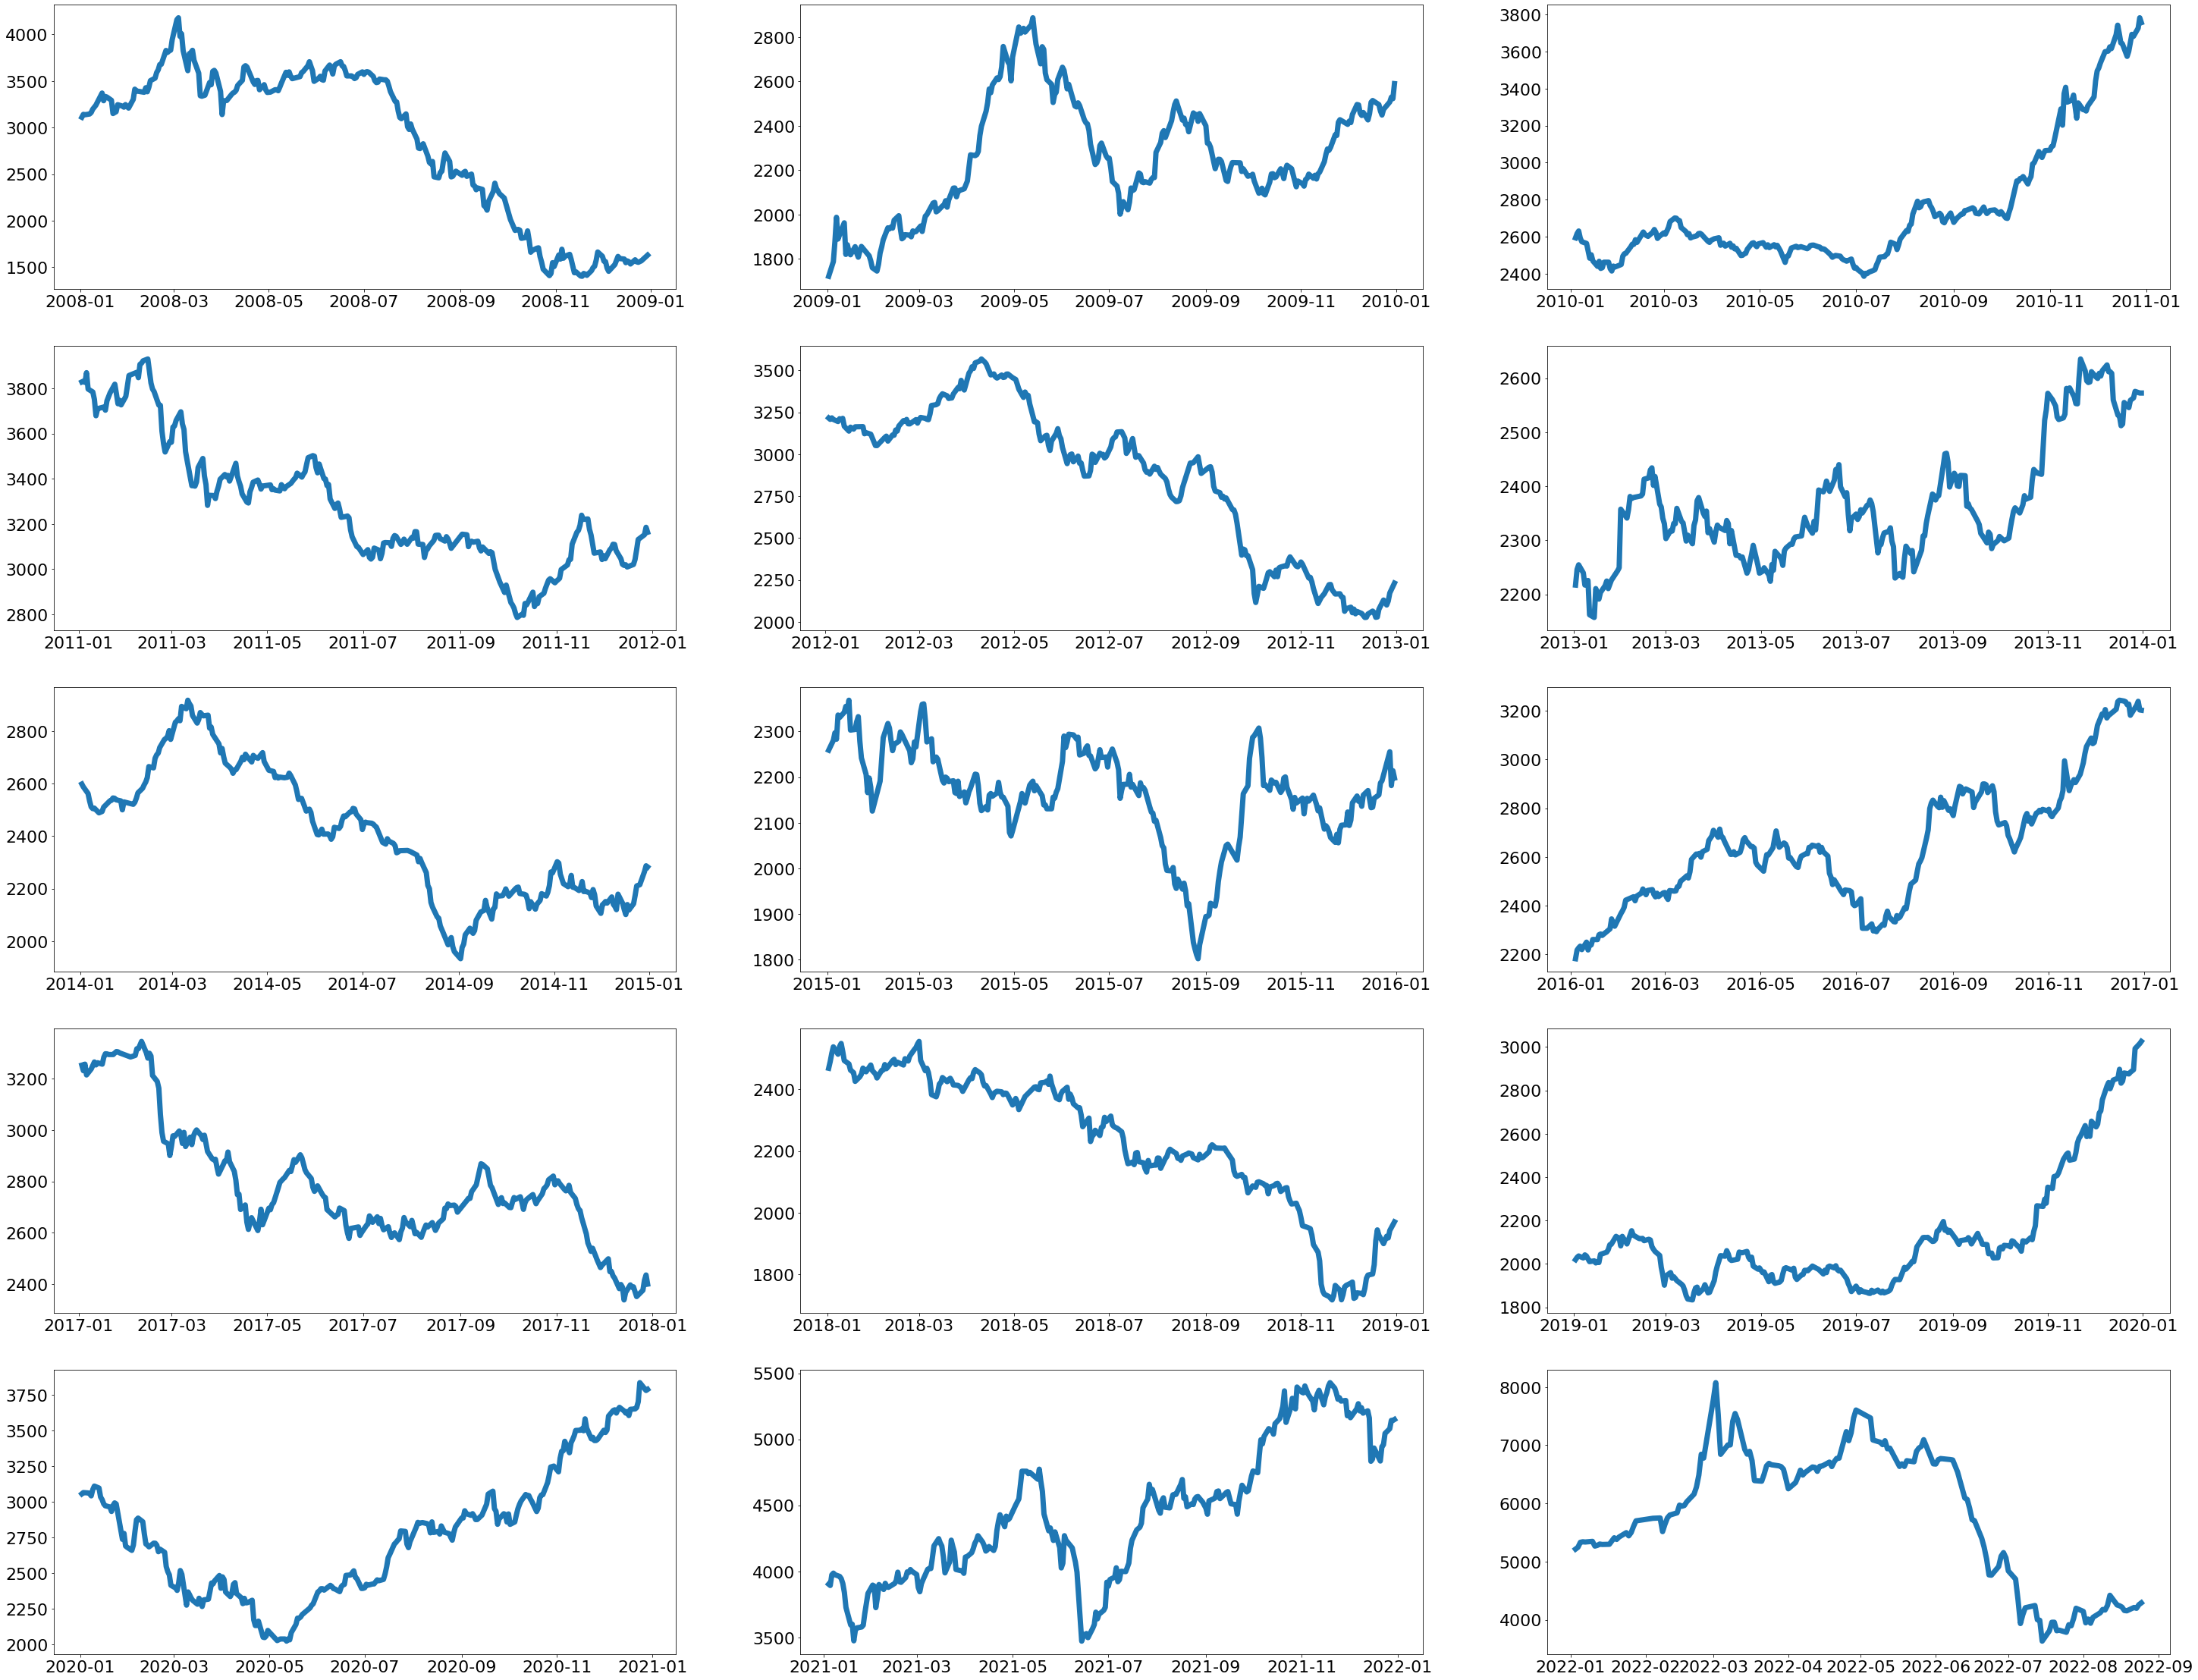

In [ ]:
filenames = sorted(glob.glob('*.csv'))
font = {'size'   : 22}
plt.rc('font', **font)
fig, axs = plt.subplots(5,3,figsize=(50.0, 40.0))
i=0
j=0
for filename in filenames:
  data = pd.read_csv(filename)
  data["Date"] = pd.to_datetime(data["Date"])
  date = data["Date"]
  price = data["Price"]
  axs[i,j].plot(date, price,linewidth=7)
  j+=1
  if j>=3:
    j=0
    i+=1

#Checking for Outliers

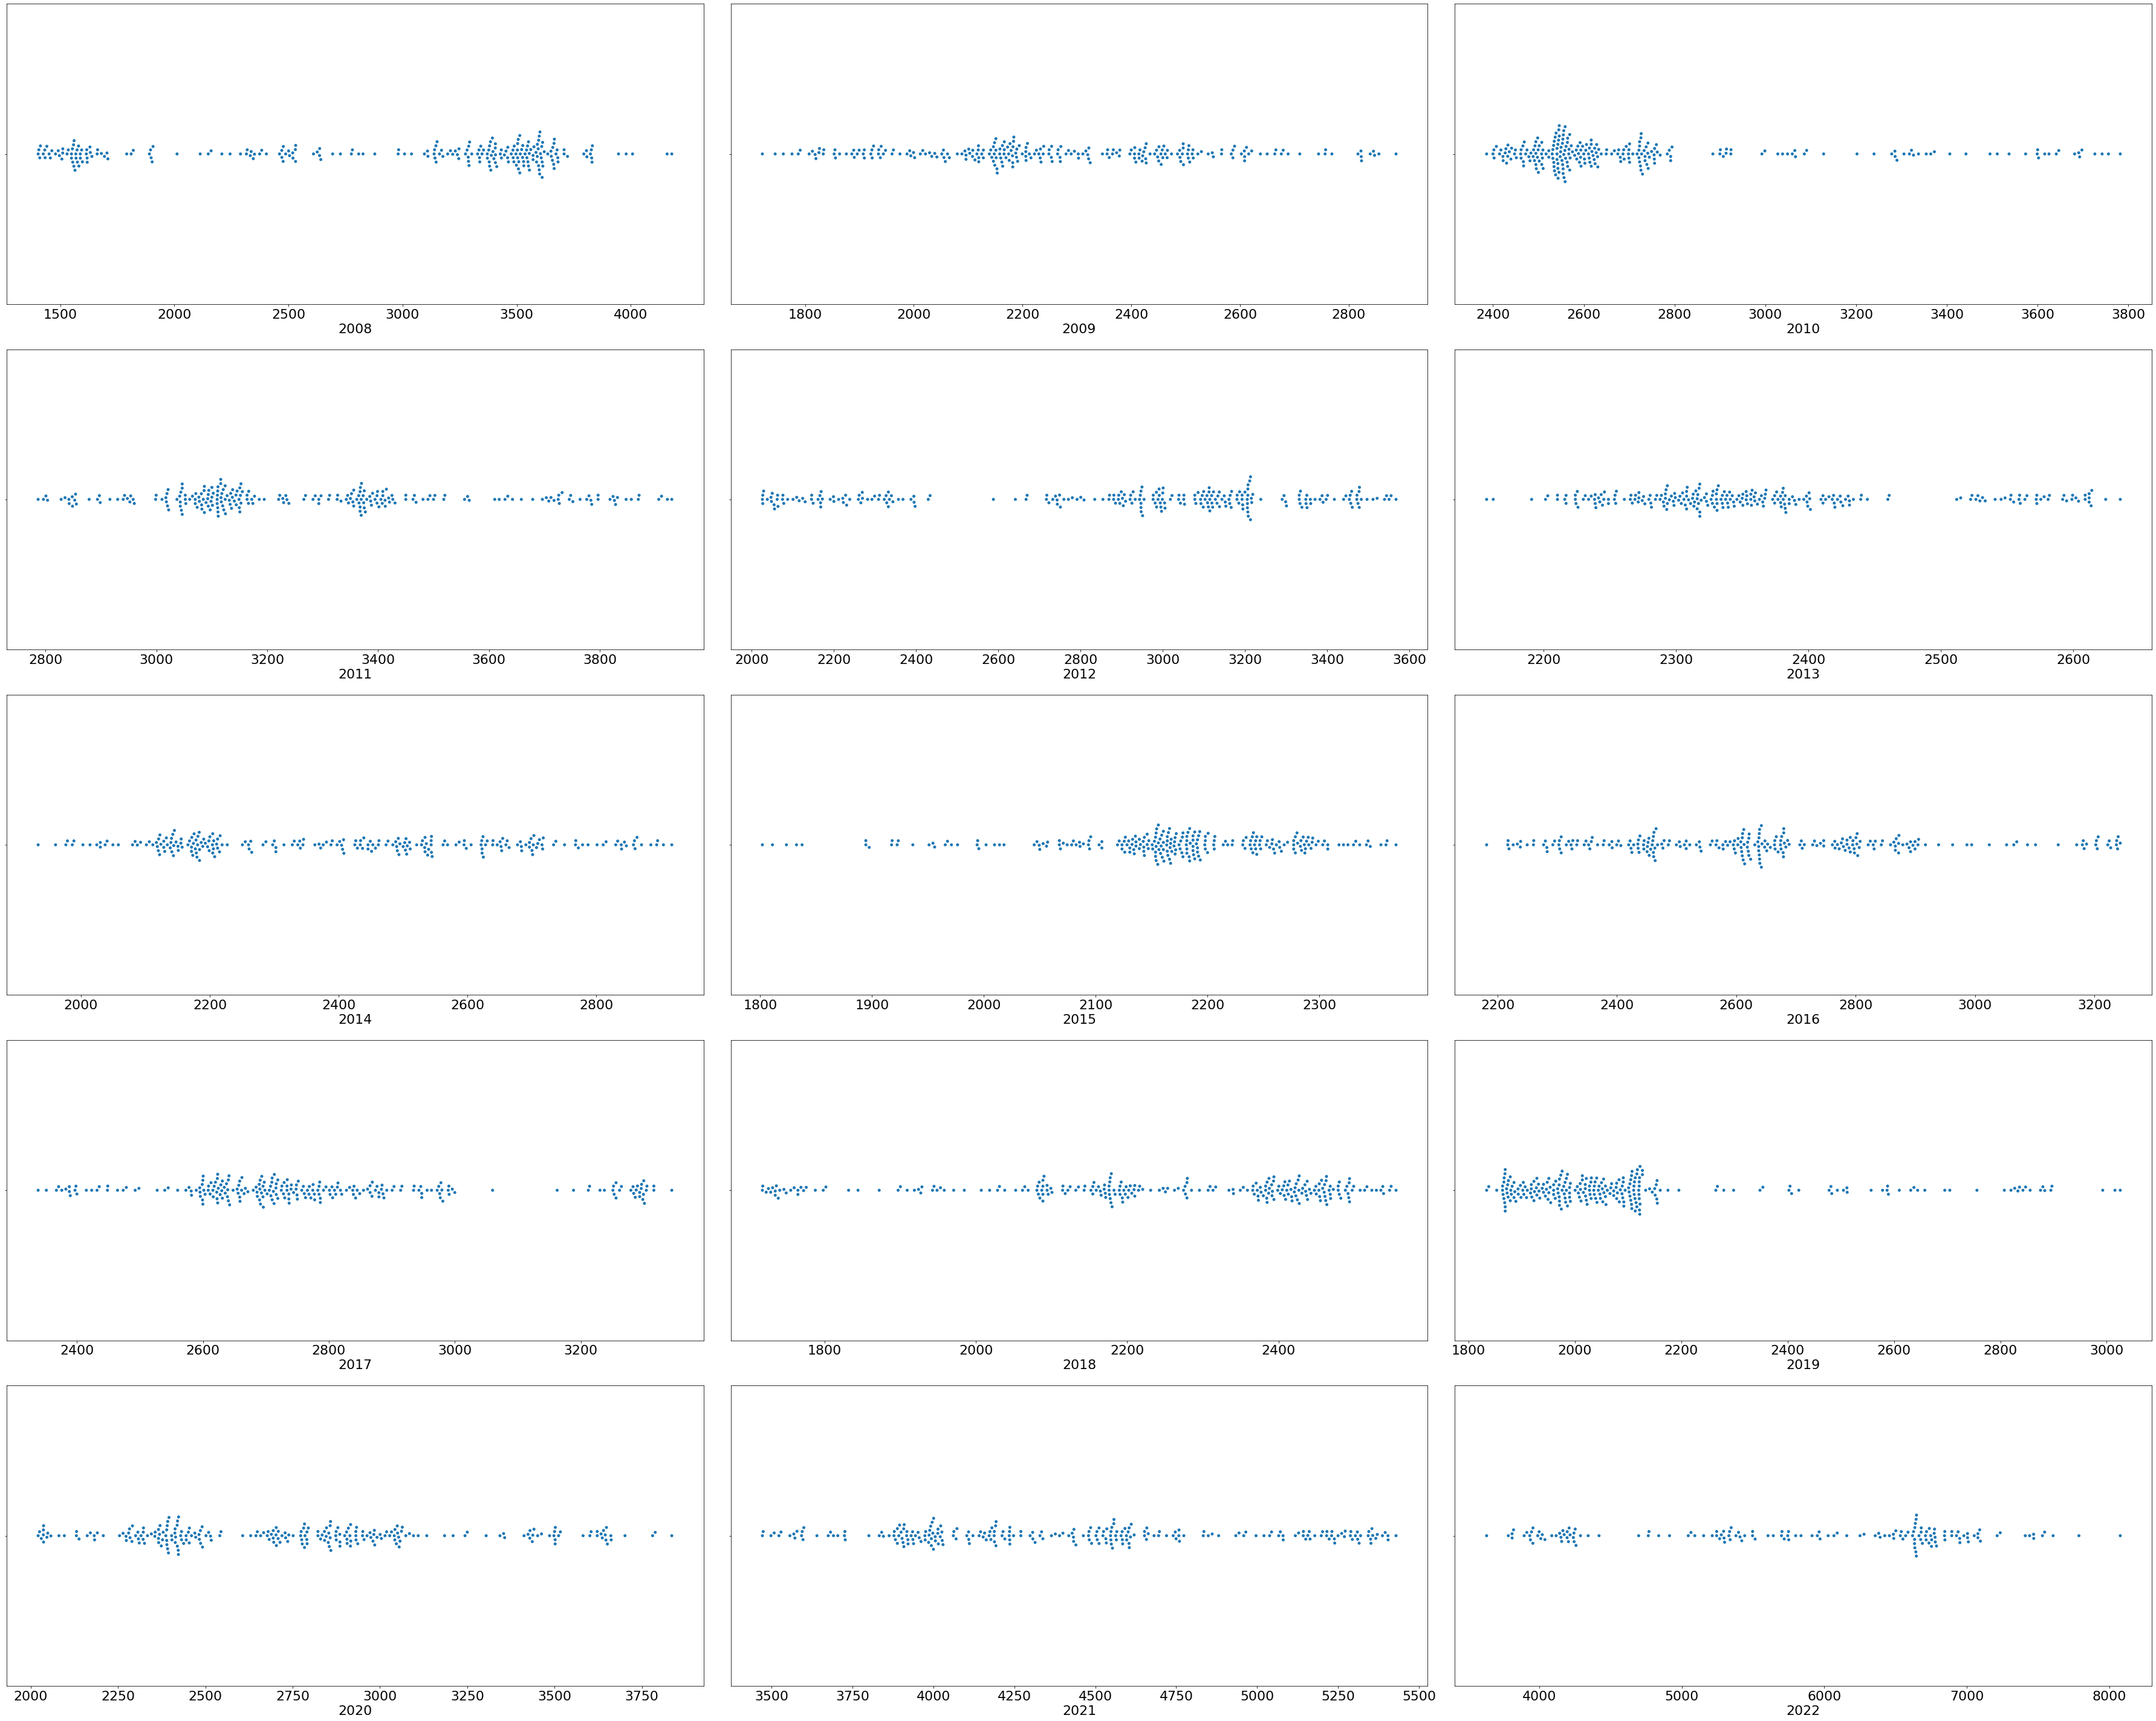

In [ ]:
# check for outliers
from collections import defaultdict
d = defaultdict(dict)
for filename in filenames:
  data = pd.read_csv(filename)
  year = os.path.splitext(filename)[0]
  d[year]=data['Price']
df = pd.DataFrame(data=d)

names = list(df.columns)
fig, axs = plt.subplots(5,3,figsize=(50.0, 40.0)) 
i=0
j=0
for name in names:
    sns.swarmplot(x=df[name], ax=axs[i, j])
    j+=1
    if j>=3:
      j=0
      i+=1

plt.tight_layout()
plt.show()

Based on observation above: there is no significant outliers in any year

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 107 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639240 sha256=b05755f08013e9cd2d4cf7b9869dfceafe11e89a9d8748b4ddf1cb333073b778
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
import fbprophet
fbprophet.__version__

'0.7.1'

#Observe price trends throughout the years

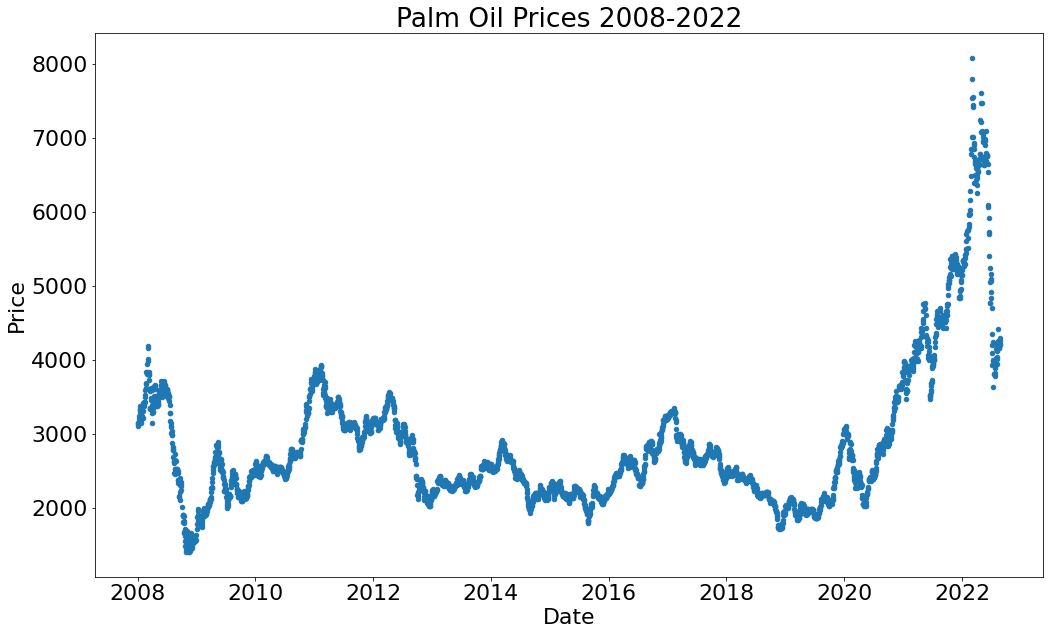

In [ ]:
plt.rc('font', **font)
files = sorted(glob.glob('*.csv'))
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.columns = ['Date', 'Price']
df['Date']= pd.to_datetime(df['Date'])

df.plot.scatter(x='Date', y='Price', figsize=(17, 10), title='Palm Oil Prices 2008-2022')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning:

Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning:

Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning:

Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:

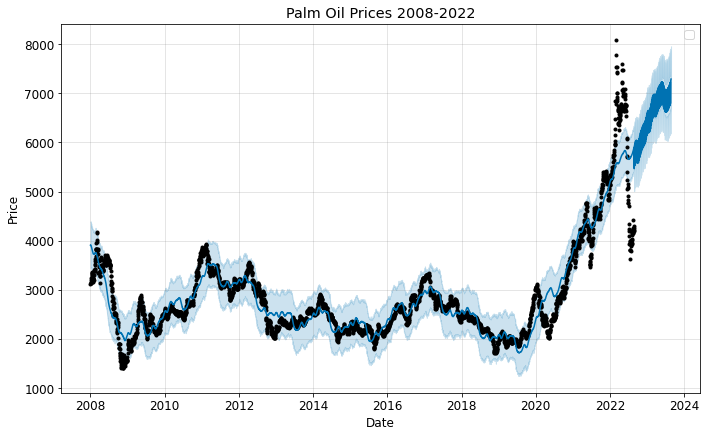

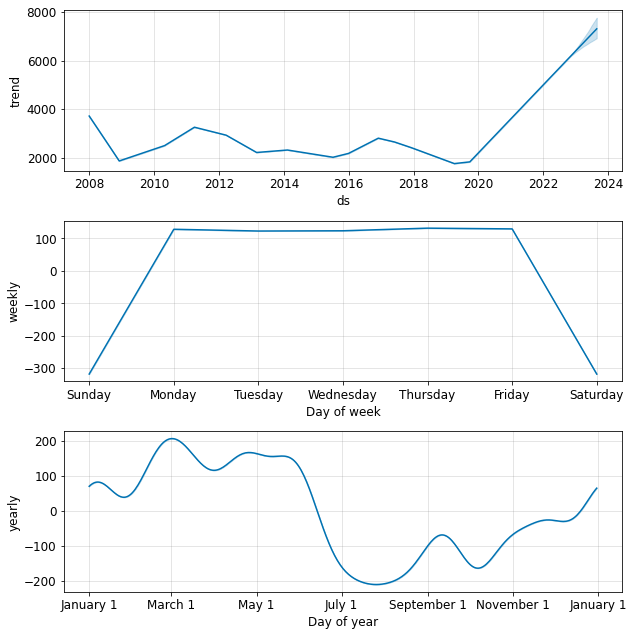

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
font = {'size'   : 12}

plt.rc('font', **font)
files = sorted(glob.glob('*.csv'))
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
# define the model
prophet = Prophet()

# fit the model
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='d')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
plt.title("Palm Oil Prices 2008-2022")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend('Actual', 'Predicted')
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

Observations: 
- Trend plot shows price has been linearly increasing since 2019 year end. (Note: Covid 19 pandemic started at 2019 November)
- Yearly plot shows price peak is on March and lowest point is on July to August
- Northeast Moonsoon Season is on Nov - March : price increases throughout season
- Southwest Moonsoon Season is on May - Sept: price decreases throughout season
- Seasons according to: https://www.britannica.com/place/Malaysia/Plant-and-animal-life


#Brent Oil Prices and Palm Oil Prices

In [ ]:
df1 = df
df1=df1.set_index('ds')
df1.columns=['palm oil']
df1

,palm oil
ds,
2008-01-02,3111.0
2008-01-03,3142.0
2008-01-04,3138.0
2008-01-07,3146.0
2008-01-08,3161.5
...,...
2022-08-19,4153.0
2022-08-22,4210.5
2022-08-23,4196.0


In [ ]:
# upload monthly oilseed prices from 2008-2022 :
# https://www.fao.org/markets-and-trade/commodities/oilcrops/fao-price-indices-for-oilseeds-vegetable-oils-and-oilmeals/en/
from google.colab import files
uploaded = files.upload()

In [ ]:
df2 = pd.read_excel('brent.xlsx',header=None)
df2=df2.set_index(0)
df2.columns=['brent']
df2

,brent
0,
2008-01-02,97.01
2008-01-03,98.45
2008-01-04,96.87
2008-01-07,94.19
2008-01-08,96.37
...,...
2022-08-24,99.87
2022-08-25,98.81
2022-08-26,101.13


In [ ]:
df3 = pd.concat([df1,df2]) # this gives 63 rows by 1 column, where the column is the values and the dates are the index
df3 = df3.reset_index() # moves the dates to a column, now called 'index', and makes a new integer index
df3 = df3.rename(columns={'index':'Date'}) #renames the column
df3=df3.groupby('Date').sum()

In [ ]:
col = df3['palm oil']
col.replace(to_replace = 0,  method='ffill', inplace=True)
df3['palm oil']=col
col = df3['brent']
col.replace(to_replace = 0,  method='ffill', inplace=True)
df3['brent']=col
df3

,palm oil,brent
Date,,
2008-01-02,3111.0,97.01
2008-01-03,3142.0,98.45
2008-01-04,3138.0,96.87
2008-01-07,3146.0,94.19
2008-01-08,3161.5,96.37
...,...,...
2022-08-24,4258.5,99.87
2022-08-25,4290.0,98.81
2022-08-26,4290.0,101.13


In [ ]:
# copy the data
df_max_scaled = df3.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,palm oil,brent
Date,,
2008-01-02,0.385192,0.673915
2008-01-03,0.389030,0.683918
2008-01-04,0.388535,0.672942
2008-01-07,0.389525,0.654324
2008-01-08,0.391444,0.669469
...,...,...
2022-08-24,0.527270,0.693783
2022-08-25,0.531171,0.686419
2022-08-26,0.531171,0.702536


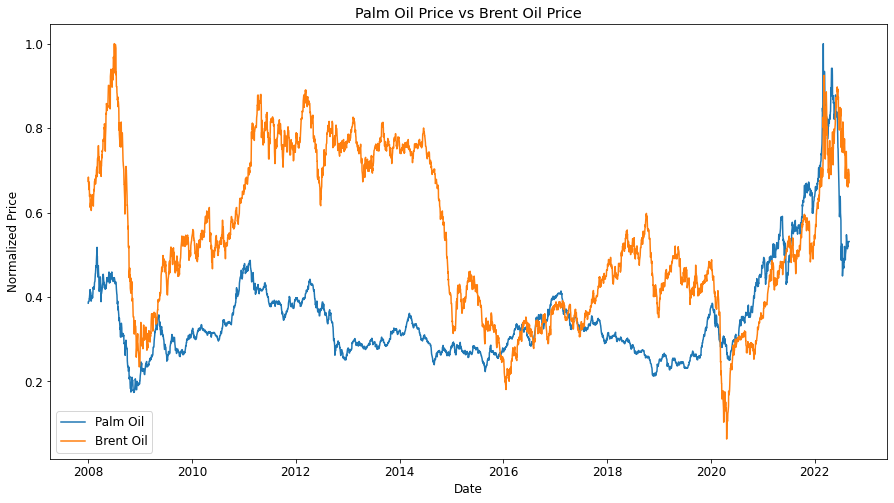

In [ ]:
plt.figure(figsize=(15,8))
df_max_scaled.index = df_max_scaled.index.to_pydatetime()
plt.plot(df_max_scaled.index,df_max_scaled['palm oil'], label = "Palm Oil")
plt.plot(df_max_scaled.index,df_max_scaled['brent'], label = "Brent Oil")
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Palm Oil Price vs Brent Oil Price')
plt.legend()

# Display a figure.
plt.show()

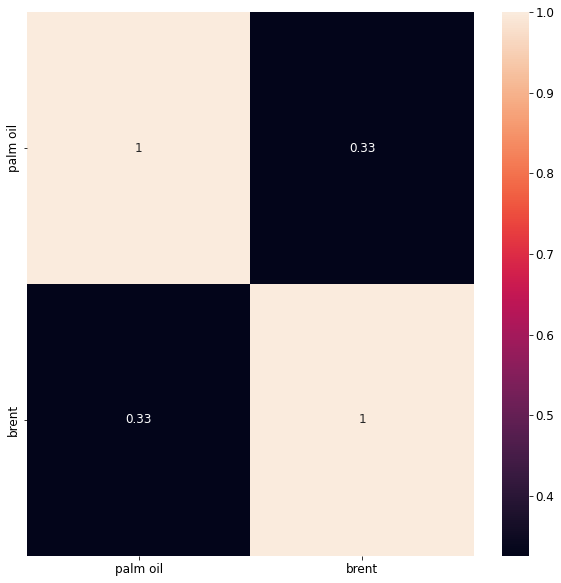

In [ ]:
# correlation map
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(),cbar=True,annot=True)

#Oilseeds Prices and Palm Oil Prices

In [ ]:
# get price mean for each month
df = df.groupby(pd.PeriodIndex(df['ds'], freq="M"))['y'].mean()

In [ ]:
df = pd.DataFrame(df)

In [ ]:
# upload monthly oilseed prices from 2008-2022 :
# https://www.fao.org/markets-and-trade/commodities/oilcrops/fao-price-indices-for-oilseeds-vegetable-oils-and-oilmeals/en/
from google.colab import files
uploaded = files.upload()

Saving CSV.csv to CSV.csv


In [ ]:
# add oilseeds to dataframe
data = pd.read_csv('CSV.csv',header=None)
data
df.drop(df.tail(3).index,inplace=True)
df2 = df.join(data.set_index(df.index))
df2.columns=['palm oil','oilseeds']
df2

,palm oil,oilseeds
ds,,
2008-01,3229.210526,131.11
2008-02,3567.526316,142.01
2008-03,3683.325000,144.69
2008-04,3439.340909,139.20
2008-05,3537.525000,140.41
...,...,...
2022-01,5379.078947,150.91
2022-02,6031.156250,162.71
2022-03,6939.891304,181.44


In [ ]:
# copy the data
df_max_scaled = df2.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,palm oil,oilseeds
ds,,
2008-01,0.465311,0.716526
2008-02,0.514061,0.776096
2008-03,0.530747,0.790742
2008-04,0.495590,0.760739
2008-05,0.509738,0.767352
...,...,...
2022-01,0.775096,0.824735
2022-02,0.869056,0.889223
2022-03,1.000000,0.991584


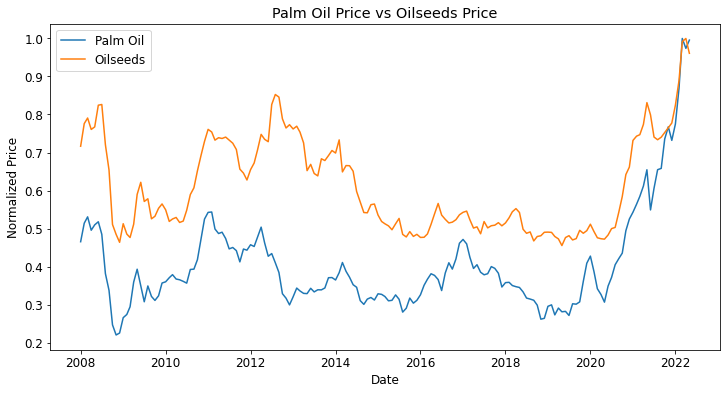

In [ ]:
plt.figure(figsize=(12,6))
df_max_scaled.index = df_max_scaled.index.to_timestamp()
plt.plot(df_max_scaled.index,df_max_scaled['palm oil'], label = "Palm Oil")
plt.plot(df_max_scaled.index,df_max_scaled['oilseeds'], label = "Oilseeds")
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Palm Oil Price vs Oilseeds Price')
plt.legend()

# Display a figure.
plt.show()

Correlation Map of Oilseeds Prices and Palm Oil Prices

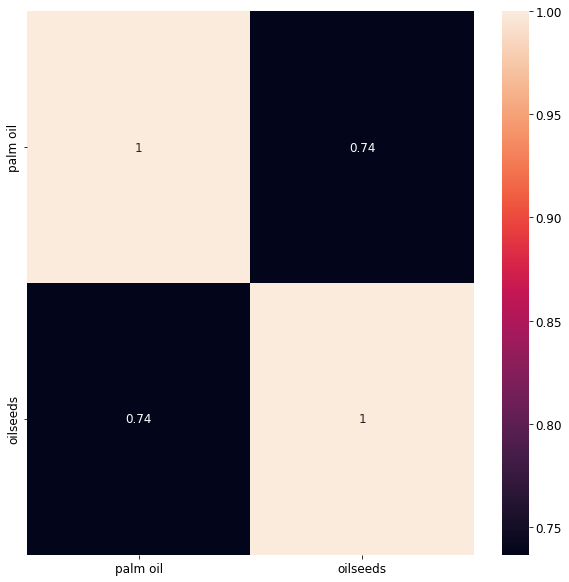

In [ ]:
# correlation map
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),cbar=True,annot=True)

Correlation score = 0.74 which shows that oilseed price and palm oil price are positively correlated

#Weather factors and Palm Oil Prices

weather factors include monthly average of:
- temperature
- humidity
- precipitation
- windspeed
- cloudcover
- data from : [link text](https://www.visualcrossing.com/weather/weather-data-services# [link text](https://))

In [ ]:
# check correlation with weather
# upload weather data from 2020-2022 :
# https://www.visualcrossing.com/weather/weather-data-services#
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


In [ ]:
# drop palm oil data to 2020-2022
df3 = df.tail(29)
df3.columns = ['Price']
df3

,Price
ds,
2020-01,2966.642857
2020-02,2682.275000
2020-03,2371.181818
2020-04,2266.318182
2020-05,2126.156250
2020-06,2419.023810
2020-07,2577.590909
2020-08,2809.368421
2020-09,2920.333333


In [ ]:
weather = pd.read_csv('weather.csv')
weather['datetime']= pd.to_datetime(weather['datetime'])
weather = weather.head(882)

In [ ]:
# add temperature column
temp = weather.groupby(pd.PeriodIndex(weather['datetime'], freq="M"))['temp'].mean()
temp = temp.head(29)
temp = pd.DataFrame(temp)
df3 = df3.join(temp.set_index(df3.index))

In [ ]:
# add humidity column
humidity = weather.groupby(pd.PeriodIndex(weather['datetime'], freq="M"))['humidity'].mean()
humidity = humidity.head(29)
humidity = pd.DataFrame(humidity)
df3 = df3.join(humidity.set_index(df3.index))

In [ ]:
# add precipitation column
precip = weather.groupby(pd.PeriodIndex(weather['datetime'], freq="M"))['precip'].mean()
precip = precip.head(29)
precip = pd.DataFrame(precip)
df3 = df3.join(precip.set_index(df3.index))

In [ ]:
# add windspeed column
windspeed = weather.groupby(pd.PeriodIndex(weather['datetime'], freq="M"))['windspeed'].mean()
windspeed = windspeed.head(29)
windspeed = pd.DataFrame(windspeed)
df3 = df3.join(windspeed.set_index(df3.index))

In [ ]:
# add cloucover column
cloudcover = weather.groupby(pd.PeriodIndex(weather['datetime'], freq="M"))['cloudcover'].mean()
cloudcover = cloudcover.head(29)
cloudcover = pd.DataFrame(cloudcover)
df3 = df3.join(cloudcover.set_index(df3.index))

Correlation Map of Palm Oil Prices and weather factors from 2020 to 2022

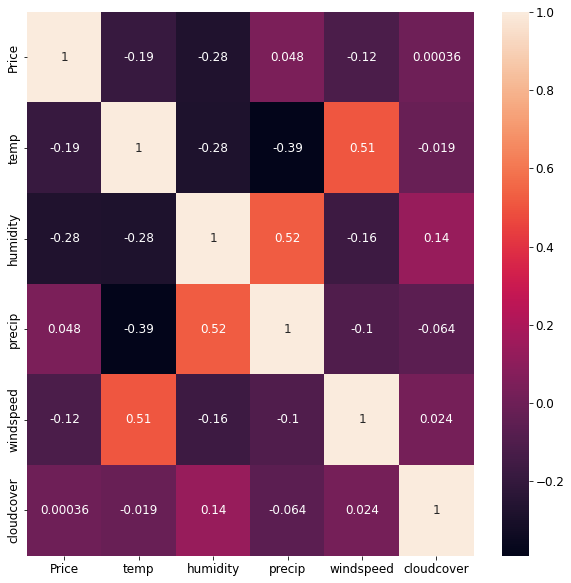

In [ ]:
# correlation map
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(),cbar=True,annot=True)

Observations: Humidity has the most correlation with palm oil price. Correlation score = -0.28 which shows that humidity and palm oil price is negatively correlated. The other factors has little to no correlation with price.